### Task :2 Unemployment Analysis With Python

### Importing Necessary Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [39]:
df=pd.read_csv('./Unemployment in India.csv')

In [40]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [41]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df.shape

(768, 7)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),740.0,1.178795e+01,1.072130e+01,0.00,4.657500e+00,8.35,1.588750e+01,76.74
Estimated Employed,740.0,7.204460e+06,8.087988e+06,49420.00,1.190404e+06,4744178.50,1.127549e+07,45777509.00
Estimated Labour Participation Rate (%),740.0,4.263012e+01,8.111094e+00,13.33,3.806250e+01,41.16,4.550500e+01,72.57


In [45]:
df.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [46]:
df[' Date']=pd.to_datetime(df[' Date'],format='mixed')

### Handle Missing Values

In [47]:
df.dropna(inplace=True)

In [48]:
# after removing null values check the final shape
df.shape

(740, 7)

In [49]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [50]:
df.columns=df.columns.str.strip()

In [51]:
df['Frequency'].unique()

array([' Monthly', 'Monthly'], dtype=object)

In [52]:
df['Frequency']=df['Frequency'].map(str.strip)

In [53]:
df['Frequency'].unique()

array(['Monthly'], dtype=object)

In [54]:
df.drop('Frequency' ,axis='columns',inplace=True)


### Regional breakdown of unemployment rates

In [55]:
un_emp_count_per_area = df.groupby('Area').size().reset_index(name='Count')
un_emp_count_per_area = un_emp_count_per_area.sort_values(by='Count', ascending=False)
un_emp_count_per_area

,Area,Count
1,Urban,381
0,Rural,359


### Extracting Month

In [56]:
df['Month'] = df['Date'].dt.month

In [57]:
import calendar

df['Month']=df['Month'].apply(lambda x :calendar.month_abbr[x])

### Month-Wise Visualization

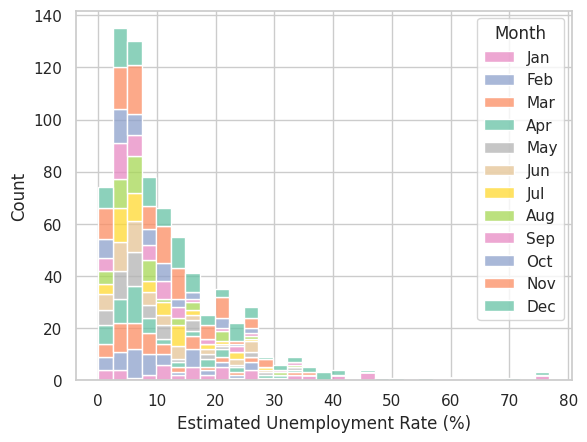

In [58]:
custom_palette = sns.color_palette("Set2")
sns.histplot(data=df, x="Estimated Unemployment Rate (%)", hue="Month", multiple="stack",palette=custom_palette)
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.legend(title="Month", loc="upper right", labels=month_order)
plt.show()

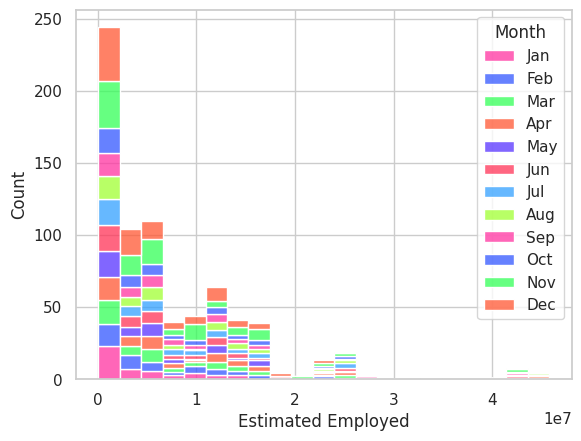

In [59]:
custom_palette = ["#FF5733", "#33FF57", "#3357FF", "#FF33A1", "#A1FF33", "#33A1FF", "#FF3357", "#5733FF", "#FF5733", "#33FF57", "#3357FF", "#FF33A1"]
sns.histplot(data=df, x="Estimated Employed", hue="Month", multiple="stack",palette=custom_palette)
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.legend(title="Month", loc="upper right", labels=month_order)
plt.show()

In [60]:
group_region = df.groupby(['Region'])[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].mean().reset_index()
group_region = round(group_region,2)


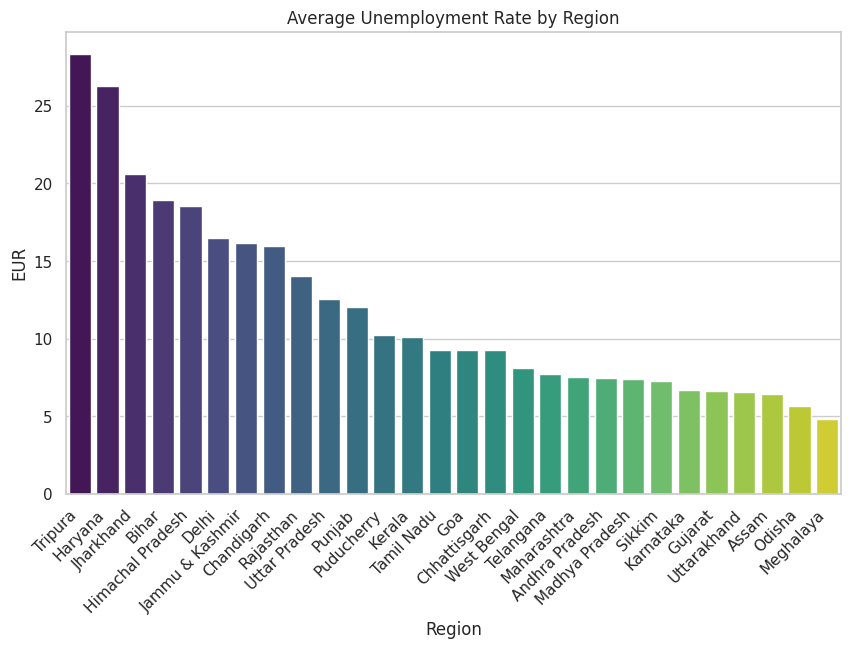

In [61]:

sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6))  

bar_data = group_region.sort_values(by='Estimated Unemployment Rate (%)', ascending=False)  # Sort the DataFrame by 'EUR' column
sns.barplot(data=bar_data, x='Region', y='Estimated Unemployment Rate (%)', palette='viridis')  # You can choose a different palette
plt.title("Average Unemployment Rate by Region")
plt.xlabel("Region")
plt.ylabel("EUR")
plt.xticks(rotation=45, ha="right")# Rotate x-axis labels for better visibility
plt.show()



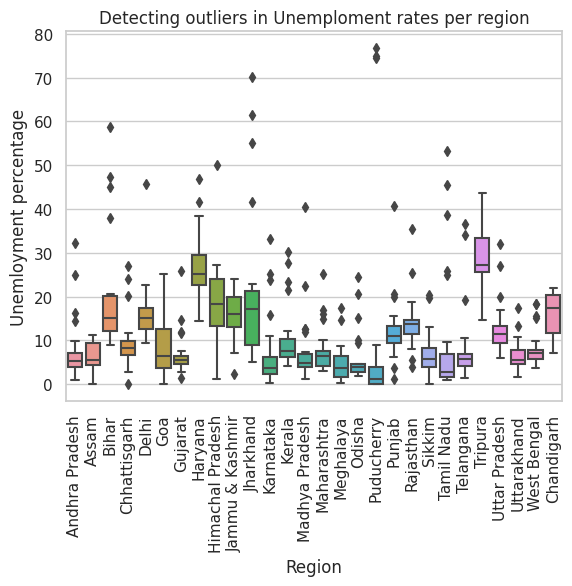

In [62]:


#Searching for outliers
sns.boxplot(data= df, x='Region', y='Estimated Unemployment Rate (%)')
plt.title('Detecting outliers in Unemploment rates per region')
plt.ylabel('Unemloyment percentage')
plt.xticks(rotation = 90)
plt.show()



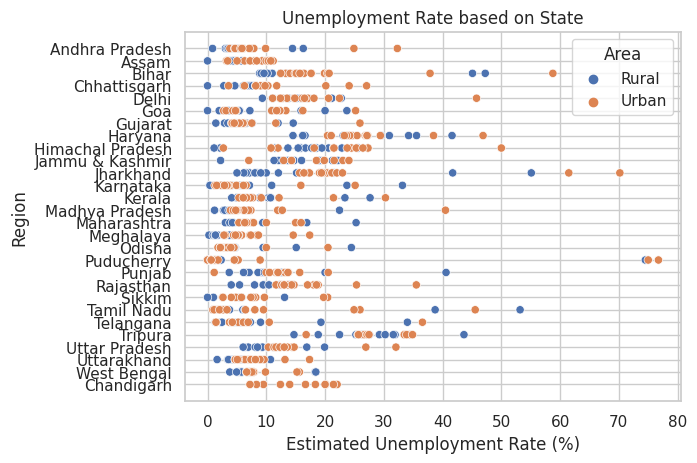

In [63]:
plt.title('Unemployment Rate based on State')
sns.scatterplot(y=df['Region'],x=df['Estimated Unemployment Rate (%)'],hue=df['Area'])
plt.show()

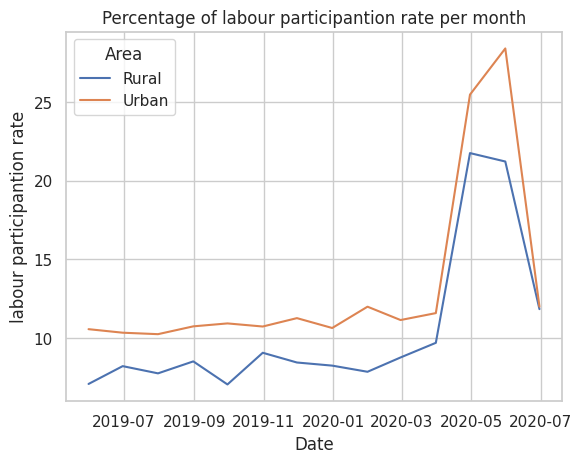

In [64]:
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Area', errorbar= None)
plt.title('Percentage of labour participantion rate per month')
plt.ylabel('labour participantion rate')
plt.show()

### Average unemployment percentage per area

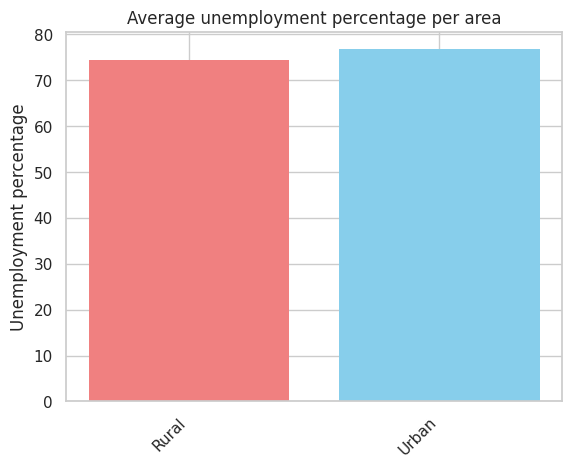

In [65]:
fig, ax = plt.subplots()
colors = ['skyblue' if area == 'Urban' else 'lightcoral' for area in df['Area']]
ax.bar(df['Area'], df['Estimated Unemployment Rate (%)'], color=colors, edgecolor='none')  # Adjust color as needed
ax.set_title("Average unemployment percentage per area")
ax.set_ylabel('Unemployment percentage')
plt.xticks(rotation=45, ha="right")  
plt.show()

### Regions boasting elevated estimated labor participation rates

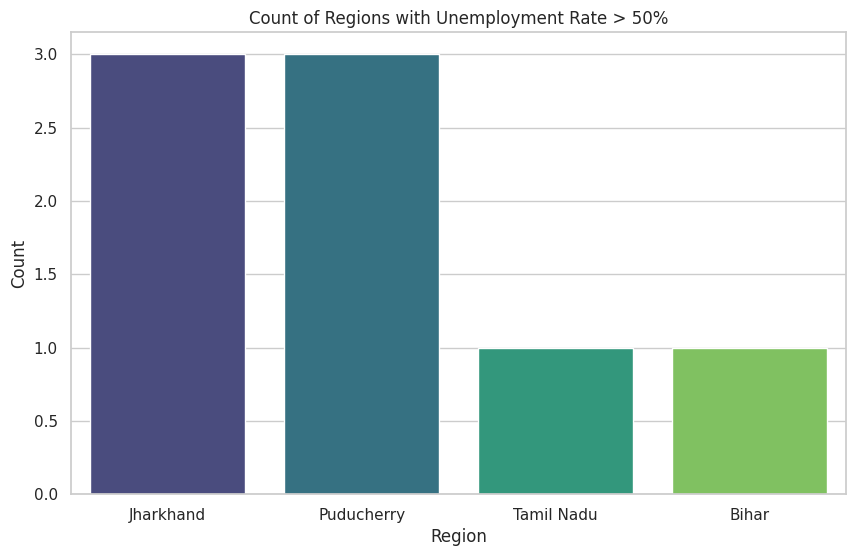

In [66]:
filtered_data = df[df['Estimated Unemployment Rate (%)'] > 50]

sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6))  

sns.countplot(data=filtered_data, x='Region', palette='viridis')  # You can choose a different palette
plt.title('Count of Regions with Unemployment Rate > 50%')
plt.xlabel('Region')
plt.ylabel('Count')

plt.show()



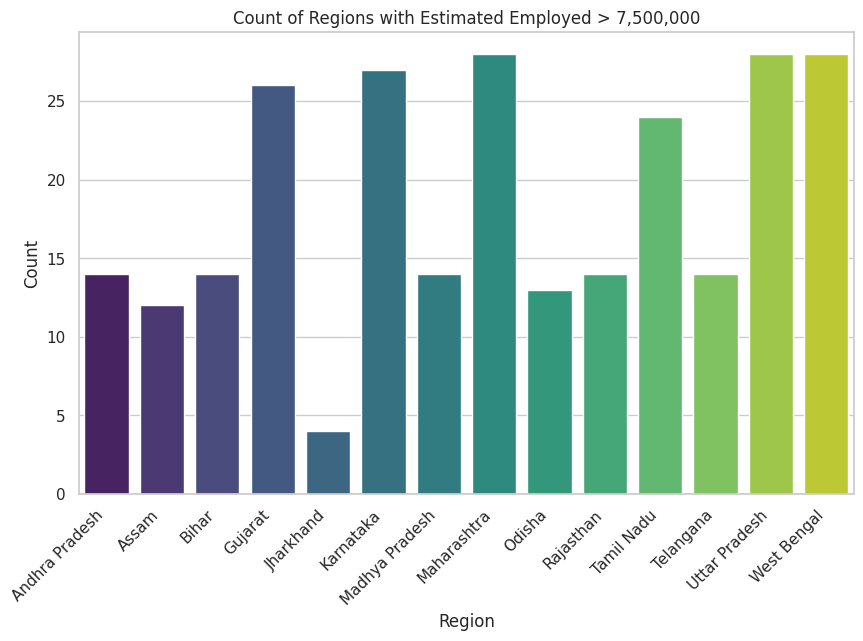

In [67]:
filtered_data = df[df['Estimated Employed'] > 7500000]

sns.set(style="whitegrid")  # Optional: Set the style
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

sns.countplot(data=filtered_data, x='Region', palette='viridis')  # You can choose a different palette
plt.title('Count of Regions with Estimated Employed > 7,500,000')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

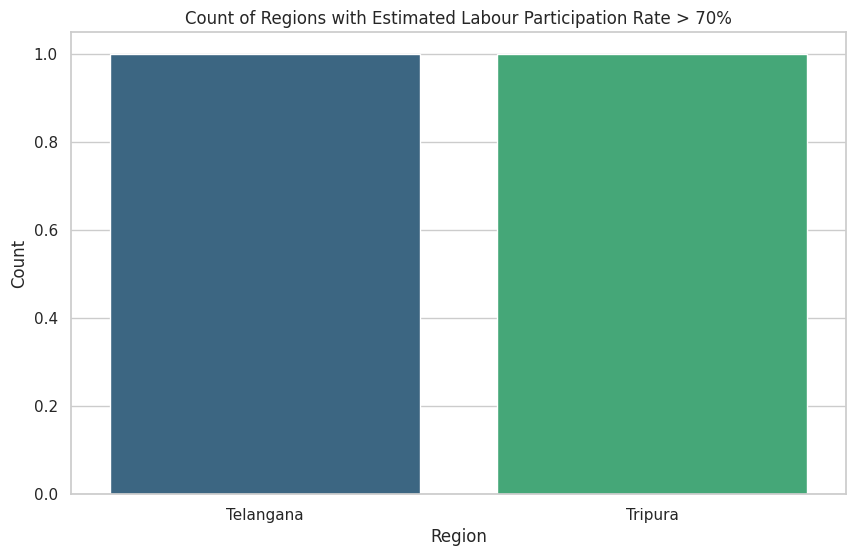

In [68]:
filtered_data = df[df['Estimated Labour Participation Rate (%)'] > 70]  # Adjust the threshold as needed

sns.set(style="whitegrid")  # Optional: Set the style
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

sns.countplot(data=filtered_data, x='Region', palette='viridis')  # You can choose a different palette
plt.title('Count of Regions with Estimated Labour Participation Rate > 70%')
plt.xlabel('Region')
plt.ylabel('Count')

plt.show()


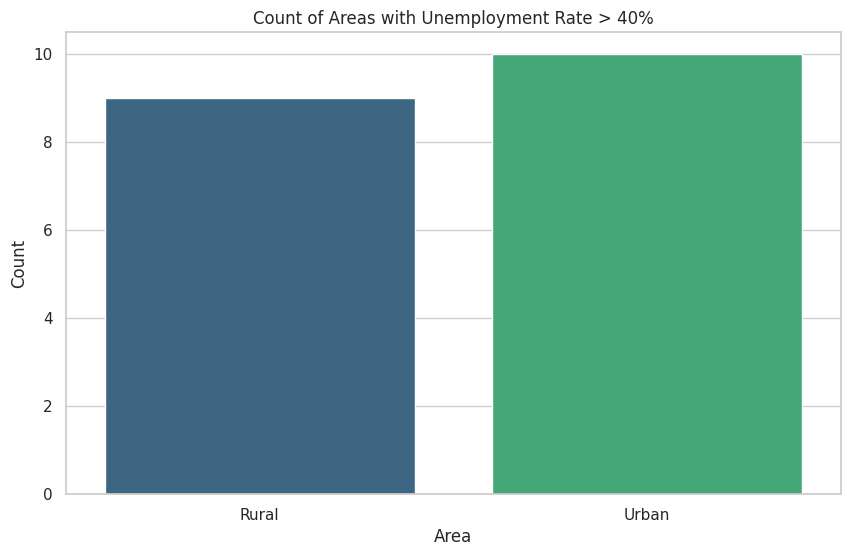

In [69]:
filtered_data = df[df['Estimated Unemployment Rate (%)'] > 40]

sns.set(style="whitegrid")  # Optional: Set the style
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

sns.countplot(data=filtered_data, x='Area', palette='viridis')  # You can choose a different palette
plt.title('Count of Areas with Unemployment Rate > 40%')
plt.xlabel('Area')
plt.ylabel('Count')

plt.show()

Text(0, 0.5, 'Count')

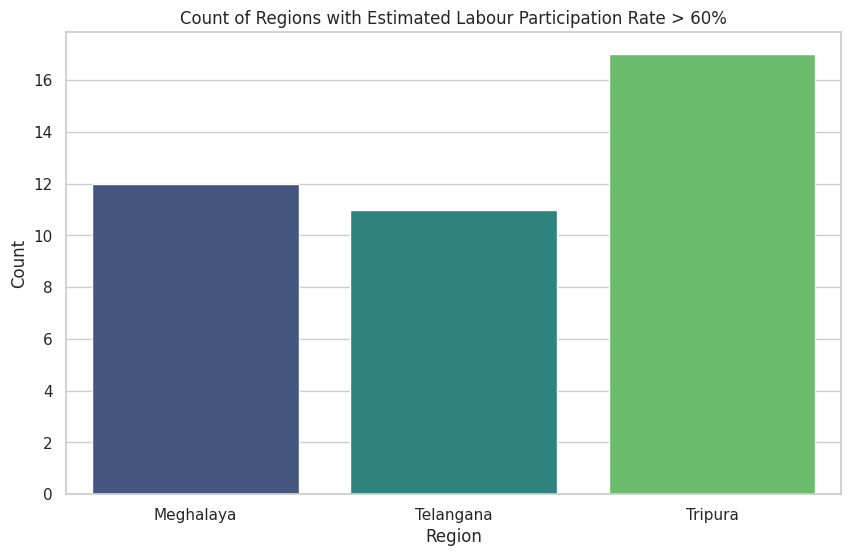

In [70]:
filtered_data = df[df['Estimated Labour Participation Rate (%)'] > 60]

sns.set(style="whitegrid")  # Optional: Set the style
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

sns.countplot(data=filtered_data, x='Region', palette='viridis')  # You can choose a different palette
plt.title('Count of Regions with Estimated Labour Participation Rate > 60%')
plt.xlabel('Region')
plt.ylabel('Count')

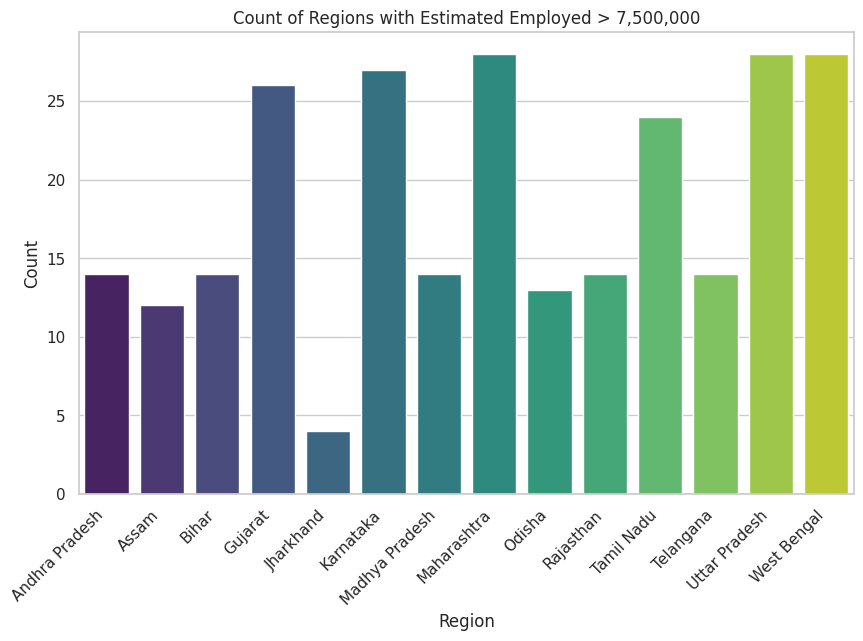

In [71]:
filtered_data = df[df['Estimated Employed'] > 7500000]

sns.set(style="whitegrid")  # Optional: Set the style
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

sns.countplot(data=filtered_data, x='Region', palette='viridis')  # You can choose a different palette
plt.title('Count of Regions with Estimated Employed > 7,500,000')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [72]:
un_emp_df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
un_emp_df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [73]:
import plotly.express as px
unemployment = un_emp_df[['Region', 'Region.1', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']]
unemployment = unemployment.groupby(['Region.1', 'Region'])[' Estimated Unemployment Rate (%)'].mean().reset_index()
fig = px.sunburst(unemployment, path=['Region.1', 'Region'], values=' Estimated Unemployment Rate (%)', title='Unemployment rate in each State and Region',height=850)
fig.show()

### The eagerly anticipated unemployment rate (%) has been revealed for Tripura.

### Sikkim is projected to have the lowest anticipated unemployment rate (%).